In [308]:
import os

import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import scipy as sp
import seaborn as sns

plt.style.use('seaborn-v0_8-whitegrid')
sns.set_theme(style = 'darkgrid', font_scale = 1.2)
%matplotlib inline 
mpl.rcParams['figure.dpi'] = 150 
mpl.rcParams["figure.figsize"] = (12, 5)

# VideoGames sale
analisi vendite
Luca Enrico Corrocher 

DataSet:

In [309]:
vg = pd.read_csv("data/vgsales.csv")
vg.drop('Rank',axis=1, inplace=True)
#Correggo formattazione anno
vg['Year'] = vg['Year'].fillna(0)
vg['Year'] = vg['Year'].astype(int)

vg

,Name,Platform,Year,Genre,Publisher,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
0,Wii Sports,Wii,2006,Sports,Nintendo,41.49,29.02,3.77,8.46,82.74
1,Super Mario Bros.,NES,1985,Platform,Nintendo,29.08,3.58,6.81,0.77,40.24
2,Mario Kart Wii,Wii,2008,Racing,Nintendo,15.85,12.88,3.79,3.31,35.82
3,Wii Sports Resort,Wii,2009,Sports,Nintendo,15.75,11.01,3.28,2.96,33.00
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,Nintendo,11.27,8.89,10.22,1.00,31.37
...,...,...,...,...,...,...,...,...,...,...
16593,Woody Woodpecker in Crazy Castle 5,GBA,2002,Platform,Kemco,0.01,0.00,0.00,0.00,0.01
16594,Men in Black II: Alien Escape,GC,2003,Shooter,Infogrames,0.01,0.00,0.00,0.00,0.01
16595,SCORE International Baja 1000: The Official Game,PS2,2008,Racing,Activision,0.00,0.00,0.00,0.00,0.01
16596,Know How 2,DS,2010,Puzzle,7G//AMES,0.00,0.01,0.00,0.00,0.01


In [310]:
#Cambio il nome per esigenze di visualizzazione
vg['Genre'] = vg['Genre'].replace('Role-Playing', 'RP')

In [311]:
vg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16598 entries, 0 to 16597
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Name          16598 non-null  object 
 1   Platform      16598 non-null  object 
 2   Year          16598 non-null  int64  
 3   Genre         16598 non-null  object 
 4   Publisher     16540 non-null  object 
 5   NA_Sales      16598 non-null  float64
 6   EU_Sales      16598 non-null  float64
 7   JP_Sales      16598 non-null  float64
 8   Other_Sales   16598 non-null  float64
 9   Global_Sales  16598 non-null  float64
dtypes: float64(5), int64(1), object(4)
memory usage: 1.3+ MB


In [312]:
numero_di_generi = vg['Genre'].unique().shape
print(numero_di_generi)

numero_di_piattaforme = vg['Platform'].unique().shape
print(numero_di_piattaforme)


(12,)
(31,)


DOMANDE:
1) Generi più venduti
2) Piattaforma con più vendite
3) Annata migliore, cosa la carattrizza
4) Studio per regione e quale infuelza magigormente le vendite
5) Confronto vendite biglietti film

## Studio dei generi

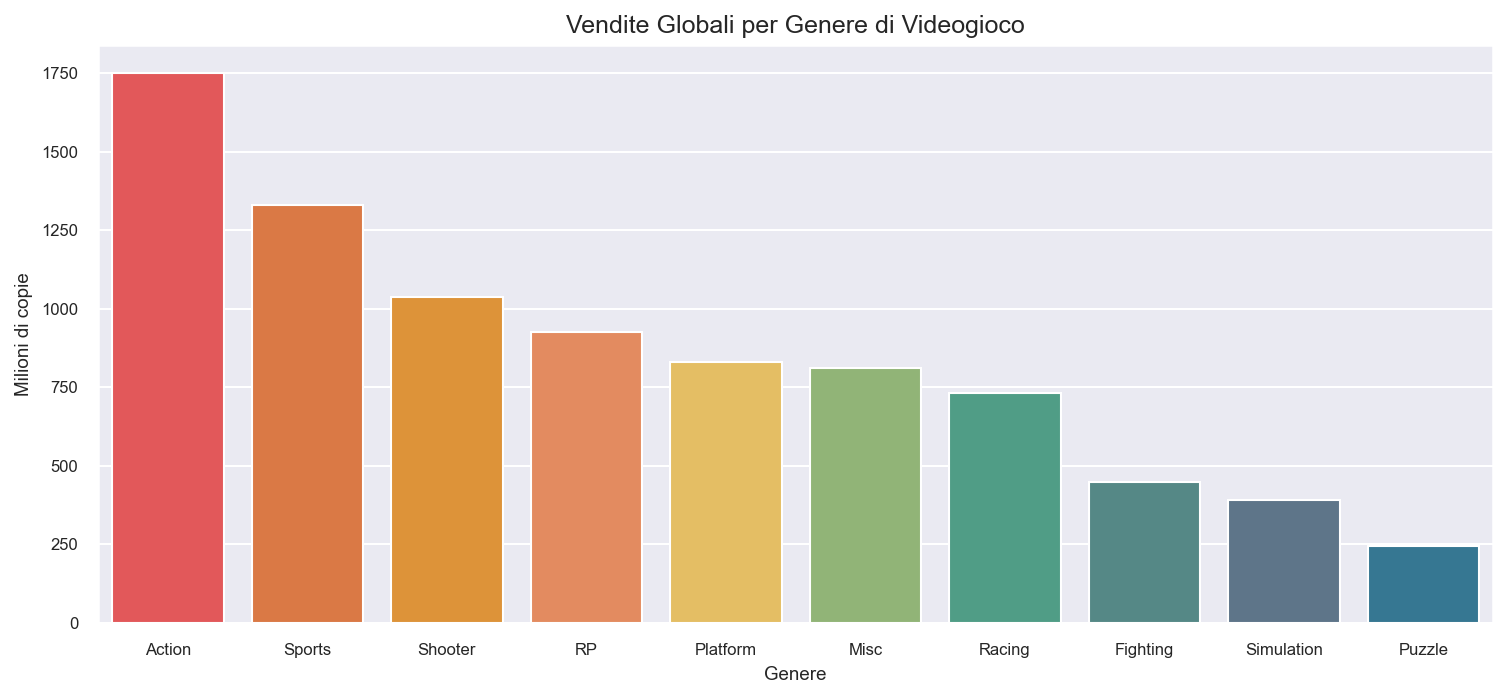

In [313]:
#creo una serie con index il genere e values la somma delle vendite per ogni genere
somma_per_genere = vg.groupby('Genre')['Global_Sales'].sum()
#ordino
somma_per_genere =  somma_per_genere.sort_values().nlargest(10)

#palette cromatica
palette = sns.color_palette(["#f94144","#f3722c","#f8961e","#f9844a","#f9c74f","#90be6d","#43aa8b","#4d908e","#577590","#277da1"])

# Creazione del grafico con Seaborn
plt.figure(figsize=(12, 5))  # Imposta larghezza e altezza
sns.barplot(x=somma_per_genere.index, y=somma_per_genere.values, palette=palette, hue=palette, legend=False)

# Personalizzazione delle etichette
plt.xticks( fontsize=8)  # Ruota le etichette dell'asse X
plt.yticks(fontsize=8)
plt.xlabel("Genere", fontsize=9)
plt.ylabel("Milioni di copie", fontsize=9)
plt.title("Vendite Globali per Genere di Videogioco", fontsize=12)

plt.show()

## Studio delle piattaforme

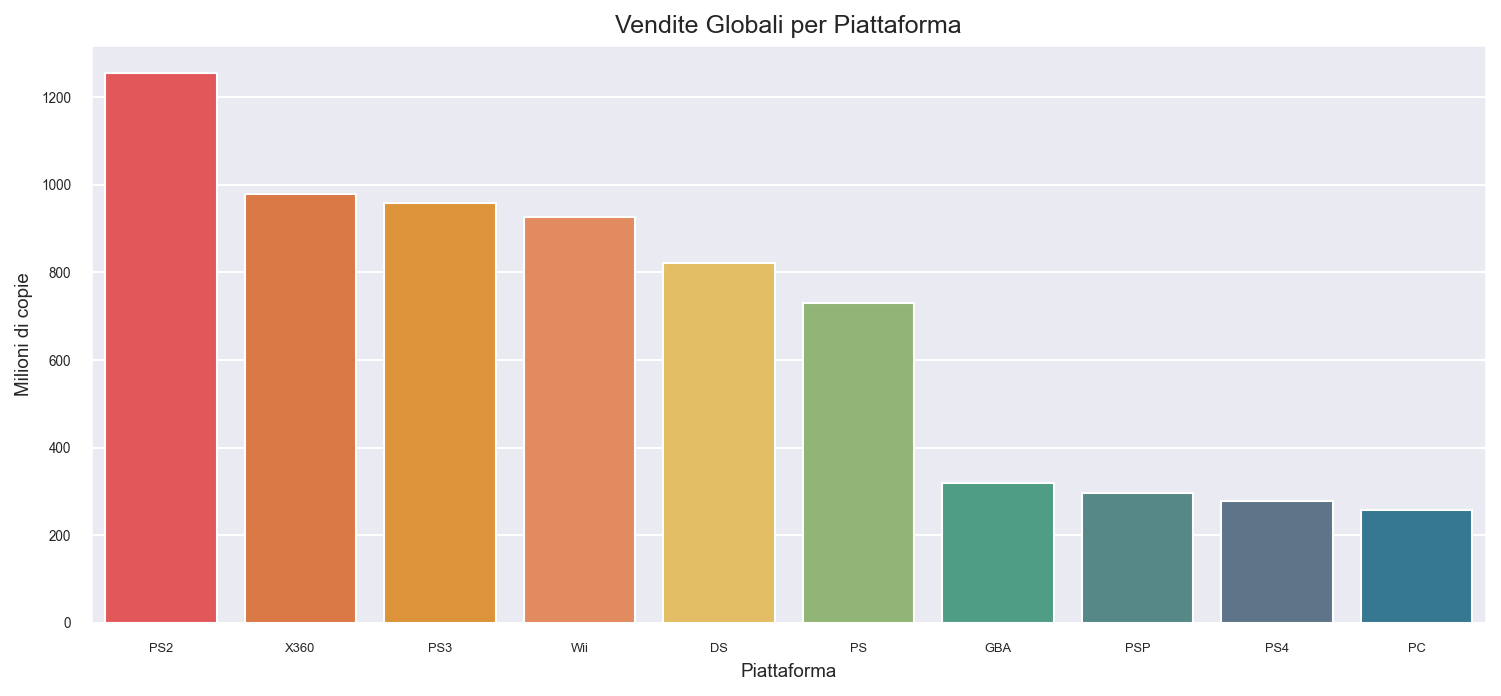

In [314]:
somma_per_piattaforma = vg.groupby('Platform')['Global_Sales'].sum()

somma_per_piattaforma = somma_per_piattaforma.nlargest(10)


# Visualizza il risultato
sns.barplot(x= somma_per_piattaforma.index,y= somma_per_piattaforma.values, palette=palette, hue=palette, legend=False)
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)
plt.xlabel("Piattaforma", fontsize=9)
plt.ylabel("Milioni di copie", fontsize=9)
plt.title("Vendite Globali per Piattaforma", fontsize=12)

plt.show()


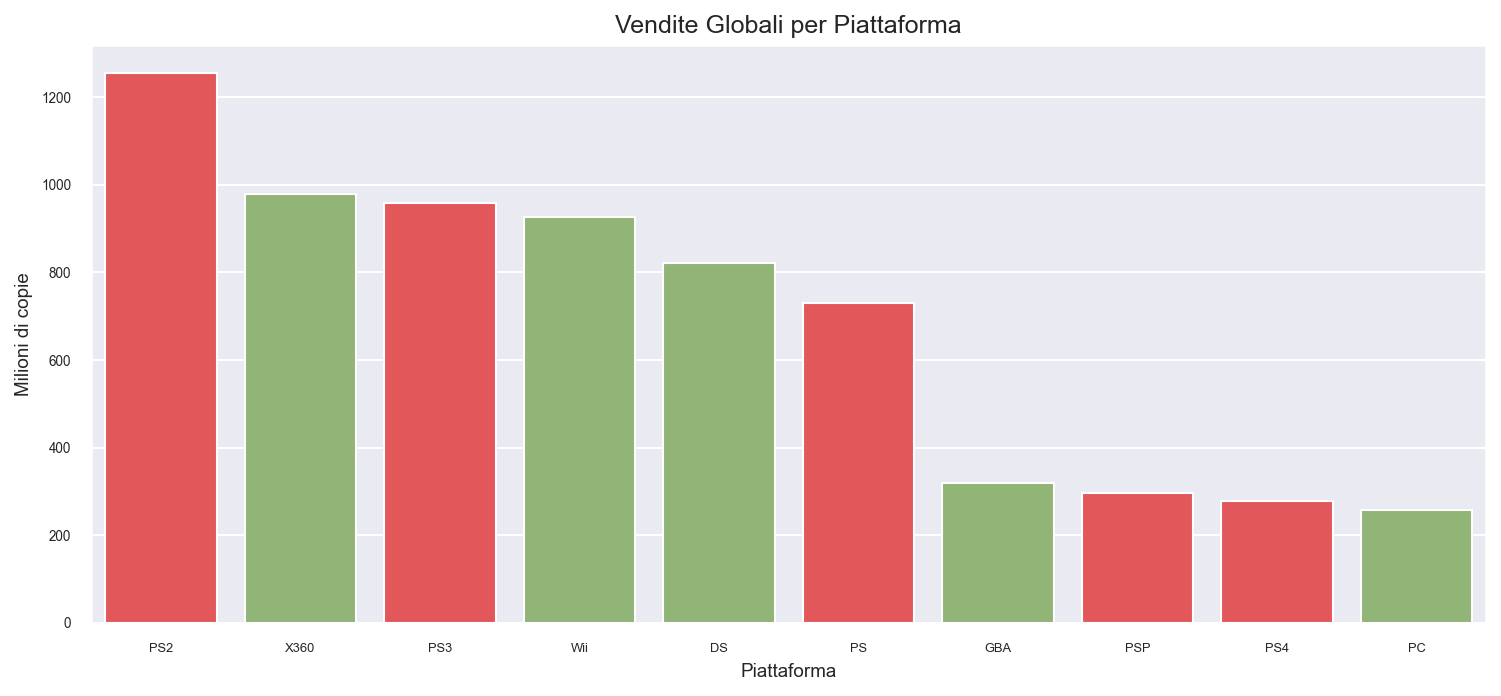

In [315]:
# Definisco le piattaforme da evidenziare
piattaforme_da_evidenziare = ["PS2", "PS3", "PS", "PSP", "PS4"]  # Modifica con le piattaforme che vuoi evidenziare

# Creo una palette personalizzata
palette_filtro = ["#f94144" if platform in piattaforme_da_evidenziare else "#90be6d" for platform in somma_per_piattaforma.index]

# Visualizza il risultato
sns.barplot(x= somma_per_piattaforma.index,y= somma_per_piattaforma.values, palette=palette_filtro, hue=palette, legend=False)
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)
plt.xlabel("Piattaforma", fontsize=9)
plt.ylabel("Milioni di copie", fontsize=9)
plt.title("Vendite Globali per Piattaforma", fontsize=12)

plt.show()


Numero di esclusive Sony:

In [316]:
#Calcolo il numero di videogiochi per le due piattaforme, shape-> restituisce una tupla con il numero di righe e colonne. Sono interessato solo al numero delle righe
numero_esclusive_PS2 = vg[vg["Platform"] == "PS2"].shape[0]
numero_esclusive_PS3 = vg[vg["Platform"] == "PS3"].shape[0]
numero_esclusive_PS = vg[vg["Platform"] == "PS"].shape[0]
numero_esclusive_PSP = vg[vg["Platform"] == "PSP"].shape[0]
numero_esclusive_PS4 = vg[vg["Platform"] == "PS4"].shape[0]
numero_esclusive_sony = numero_esclusive_PS2 + numero_esclusive_PS3 + numero_esclusive_PS + numero_esclusive_PSP + numero_esclusive_PS4
print(str(numero_esclusive_sony))



6235


## Studio annata migliore

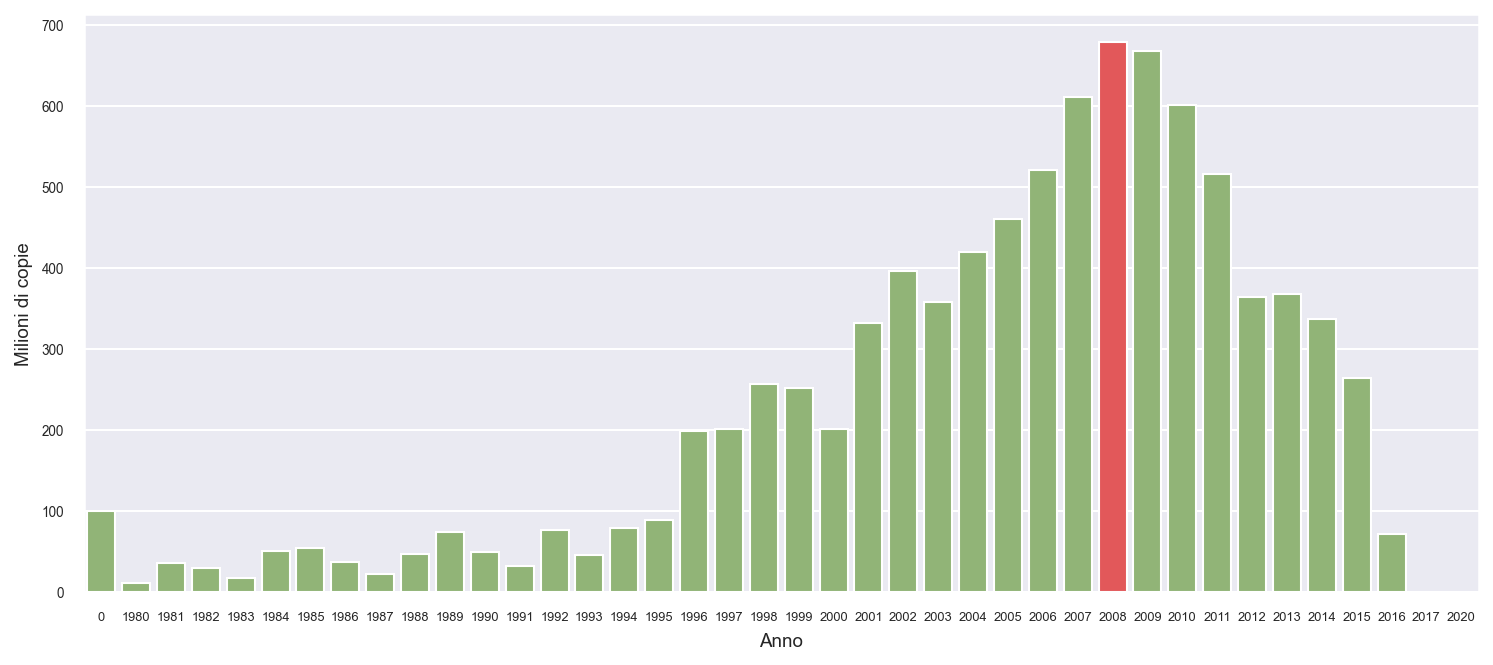

In [317]:
# Somma delle vendite globali per anno
somma_per_anno = vg.groupby('Year')['Global_Sales'].sum()

max_sales = somma_per_anno.max()
max_year = somma_per_anno.idxmax()
# Assegna un colore in base al valore delle vendite globali
palette_filtro_max = ["#90be6d"  if anno == max_year else "#f94144" for anno in somma_per_anno.index]

# Creo il grafico
fig, ax = plt.subplots()
sns.barplot(x=somma_per_anno.index, y=somma_per_anno.values, palette=["#90be6d", "#f94144"], hue=palette_filtro_max,legend=False, ax=ax)


# Imposta formattazione degli assi
#ax.set_xlim(1980, 2020)
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)
plt.ylabel("Milioni di copie", fontsize=9)
plt.xlabel("Anno", fontsize=9)


plt.show()


## Studio per regione

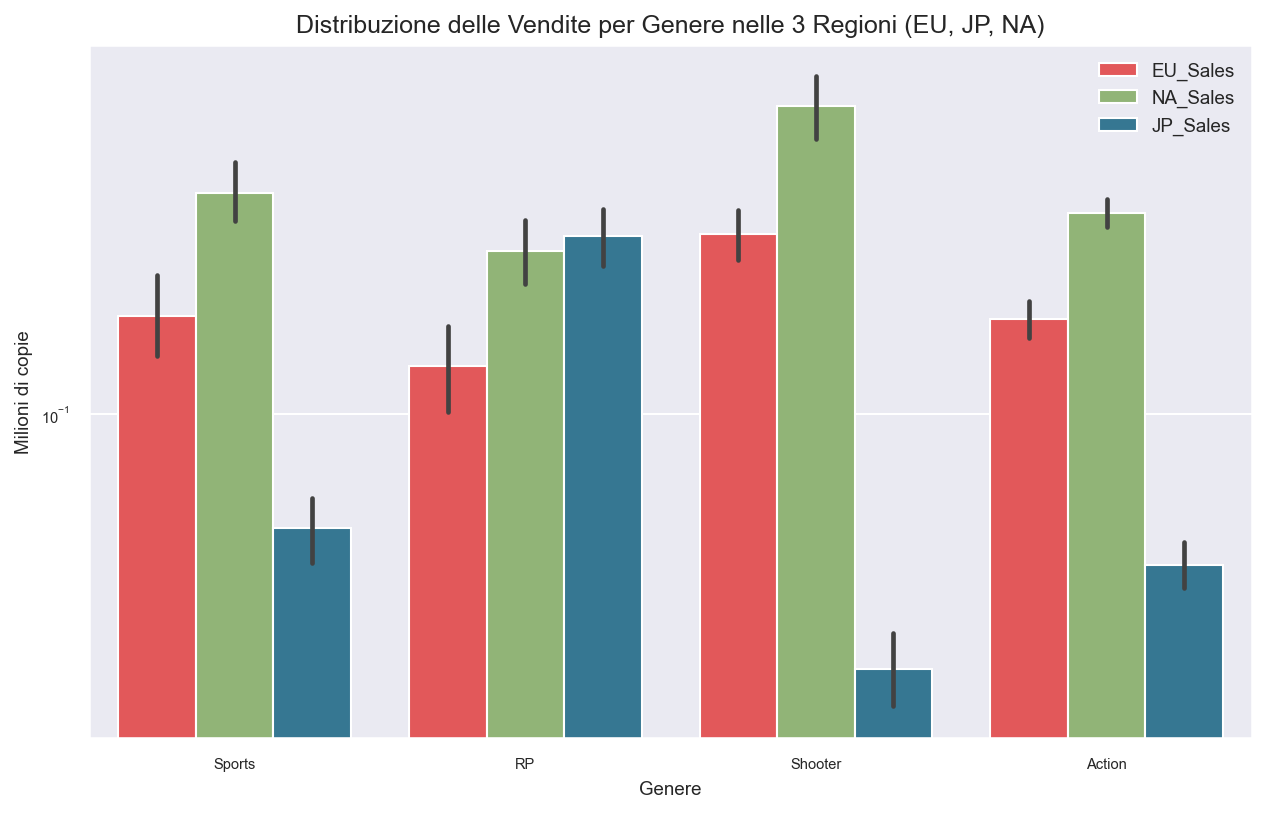

In [318]:
filtro = "Action", "RP", "Sports", "Shooter"
top_generi = vg[vg['Genre'].isin(filtro)]
# Reshape del DataFrame per unire le vendite in un'unica colonna 'Sales' e creare una colonna per la regione
data_melted = top_generi.melt(id_vars=["Genre"], value_vars=["EU_Sales", "NA_Sales", "JP_Sales"], 
                        var_name="Regione", value_name="Vendite")

# Creazione del violinplot
plt.figure(figsize=(10, 6))
sns.barplot(data=data_melted, x='Genre', y='Vendite', hue='Regione', palette=["#f94144","#90be6d","#277da1"])

# Titolo e etichette
plt.title('Distribuzione delle Vendite per Genere nelle 3 Regioni (EU, JP, NA)', fontsize=12)
plt.legend(fontsize=9)
plt.xlabel('Genere', fontsize=9)
plt.ylabel("Milioni di copie", fontsize=9)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.yscale('log')
# Mostra il grafico

plt.show()


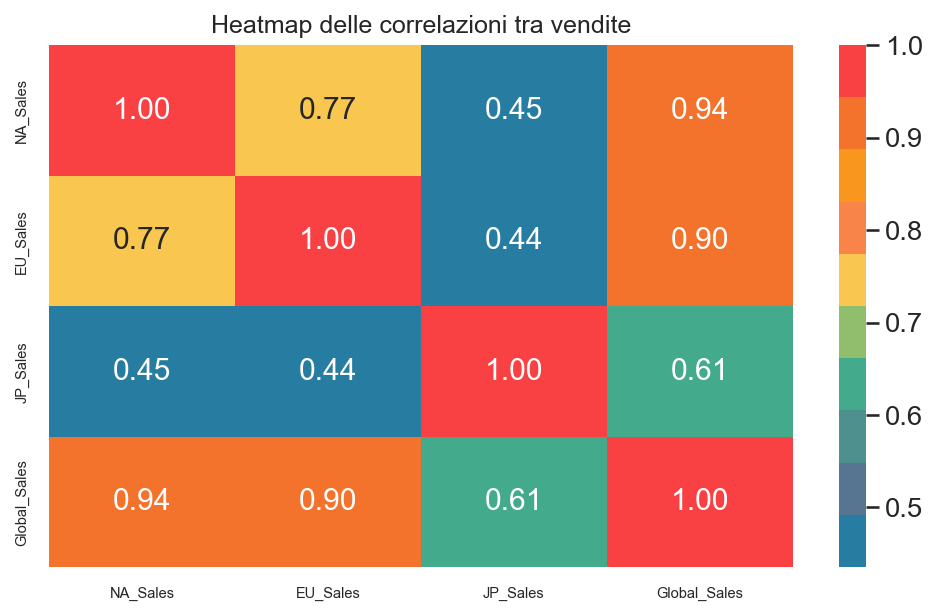

In [319]:
import numpy as np

correlation_matrix = vg[["NA_Sales", "EU_Sales", "JP_Sales", "Global_Sales"]].corr()

palette_inversa = palette[::-1]
# Creazione della heatmap
plt.figure(figsize=(8,6))
sns.heatmap(correlation_matrix, annot=True, cmap=palette_inversa, fmt=".2f")
plt.title("Heatmap delle correlazioni tra vendite", fontsize=12)
plt.subplots_adjust(bottom=0.3)
plt.xticks(fontsize=7)
plt.yticks(fontsize=7)
plt.show()


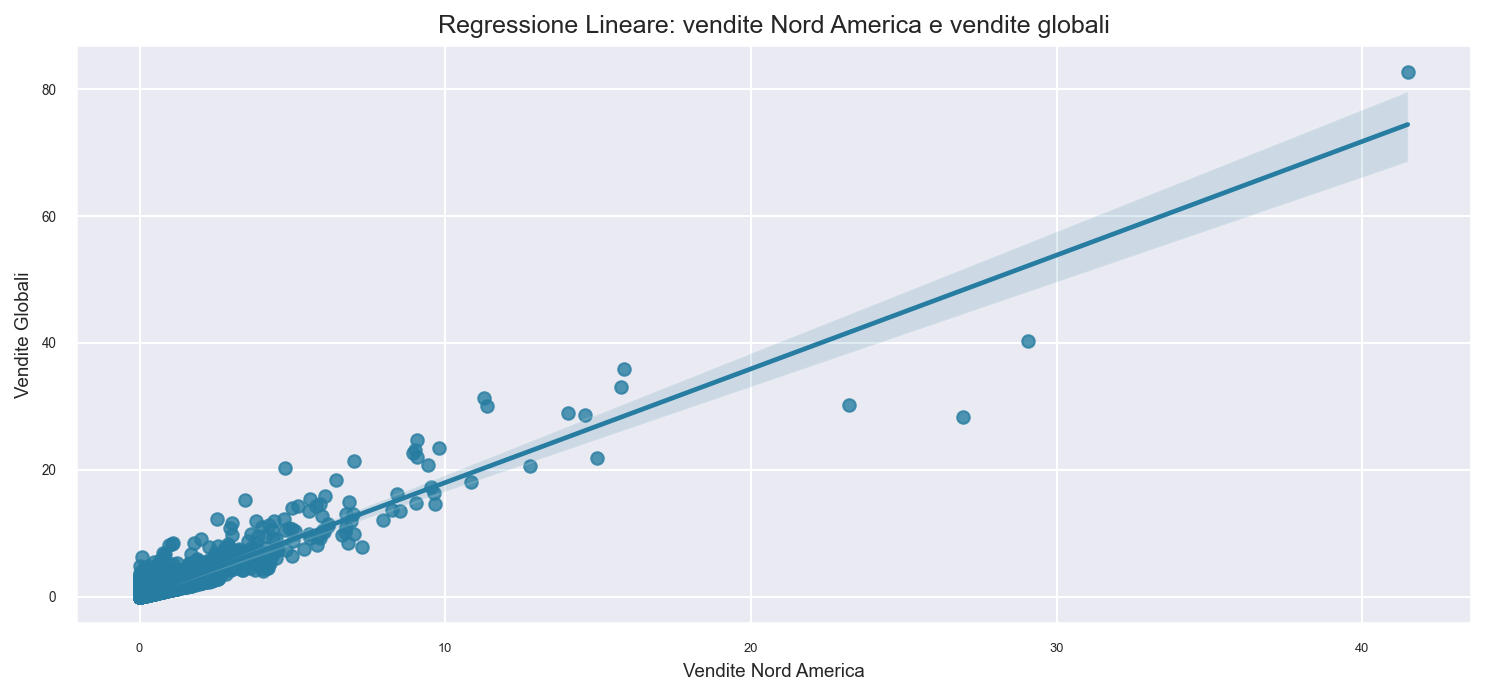

In [320]:
sns.regplot(x=vg["NA_Sales"], y=vg["Global_Sales"], color="#277da1")
plt.title("Regressione Lineare: vendite Nord America e vendite globali", fontsize=12)
plt.xlabel("Vendite Nord America", fontsize=9)
plt.ylabel("Vendite Globali", fontsize=9)
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)
plt.show()

## Confronto film

In [321]:
mv = pd.read_csv("data/mvGenre.csv")

mv

,index,Genre,Year,Movies Released,Gross,Tickets Sold,Inflation-Adjusted Gross,Top Movie,Top Movie Gross (That Year),Top Movie Inflation-Adjusted Gross (That Year)
0,0,Adventure,1995,29,771507571,177358047,1590901682,Toy Story,150148222,3.096160e+08
1,1,Adventure,1996,34,1290490033,291966054,2618935504,Independence Day,306169255,6.213435e+08
2,2,Adventure,1997,23,881902843,192135684,1723457085,Men in Black,250650052,4.898324e+08
3,3,Adventure,1998,29,1614467732,344236174,3087798481,Armageddon,201578182,3.855344e+08
4,4,Adventure,1999,27,1612432107,317407880,2847148684,Star Wars Ep. I: The Phantom Menace,430443350,7.600545e+08
...,...,...,...,...,...,...,...,...,...,...
295,295,Multiple Genres,2017,5,4614134,514394,4614114,2017 Oscar Shorts,2835355,2.835343e+06
296,296,Multiple Genres,2018,3,4787450,533717,4787441,2018 Oscar Shorts,3508777,3.508770e+06
297,297,Reality,2014,1,16826,2059,18469,The Principle,16826,1.846900e+04
298,298,Reality,2015,3,604870,71751,643606,Benpao Ba! Xiongdi,309297,3.291044e+05


In [322]:
mv['Tickets Sold'] = (mv['Tickets Sold'] / 1_000_000).round(2)

In [323]:
mv['Genre'].unique()

array(['Adventure', 'Action', 'Drama', 'Comedy', 'Thriller or Suspense',
       'Horror', 'Romantic Comedy', 'Musical', 'Documentary',
       'Dark Comedy', 'Western', 'Concert or Performance',
       'Multiple Genres', 'Reality'], dtype=object)

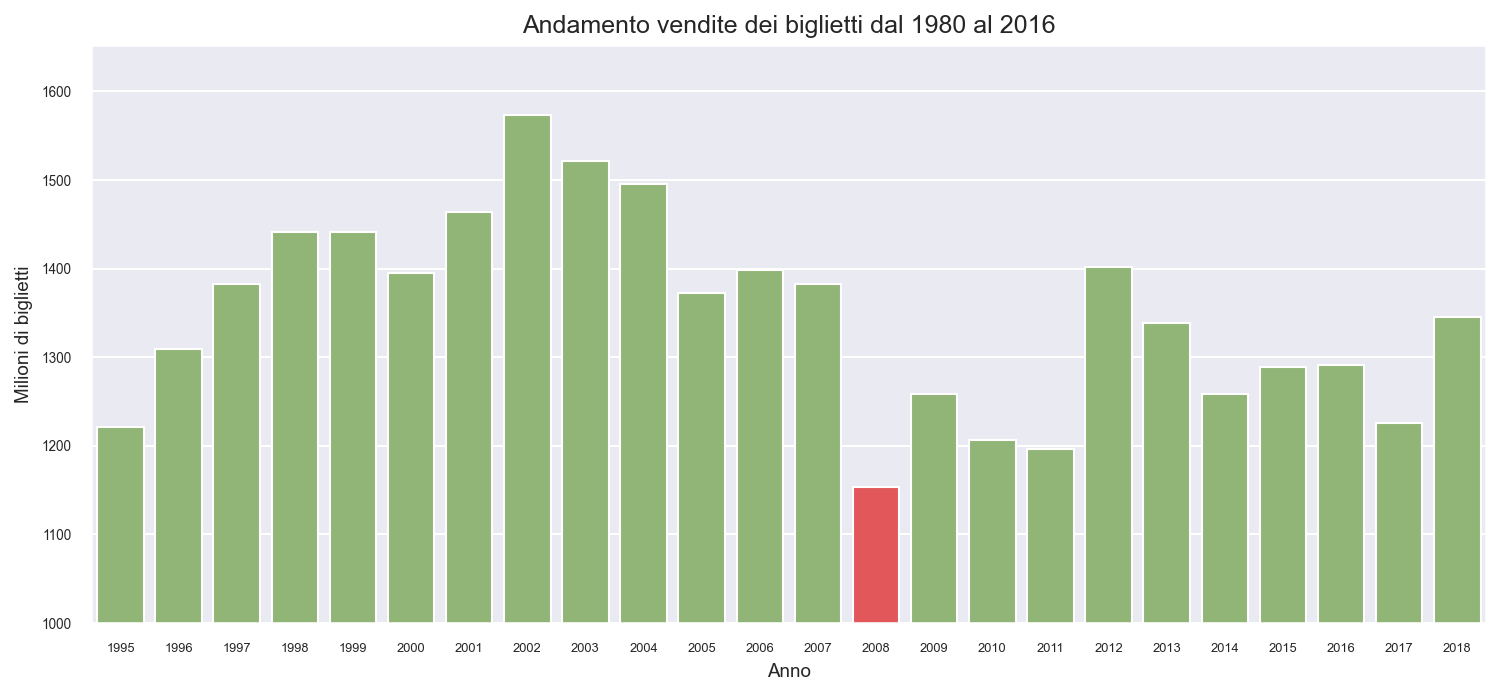

In [324]:
# Somma delle vendite globali per anno
somma_per_anno_film = mv.groupby('Year')['Tickets Sold'].sum()

min_sales = somma_per_anno_film.min()
min_year = somma_per_anno_film.idxmin()
# Assegna un colore in base al valore delle vendite globali
palette_filtro_min = ["#90be6d" if anno == min_year else "#f94144" for anno in somma_per_anno_film.index]

# Creo il grafico
fig, ax = plt.subplots()
sns.barplot(x=somma_per_anno_film.index, y=somma_per_anno_film.values, palette=["#90be6d", "#f94144"], hue=palette_filtro_min,legend=False, ax=ax)


# Imposta limiti e formattazione degli assi
ax.set_ylim(1000)
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)
plt.ylabel("Milioni di biglietti", fontsize=9)
plt.xlabel("Anno", fontsize=9)
plt.title("Andamento vendite dei biglietti dal 1980 al 2016", fontsize=12)

# Aggiungi annotazione per l'anno 2008
ax.annotate(2008, xy=(2008, max_sales), xytext=(1990, max_sales - 5), 
            arrowprops=dict(facecolor='black', shrink=0.05))

plt.show()


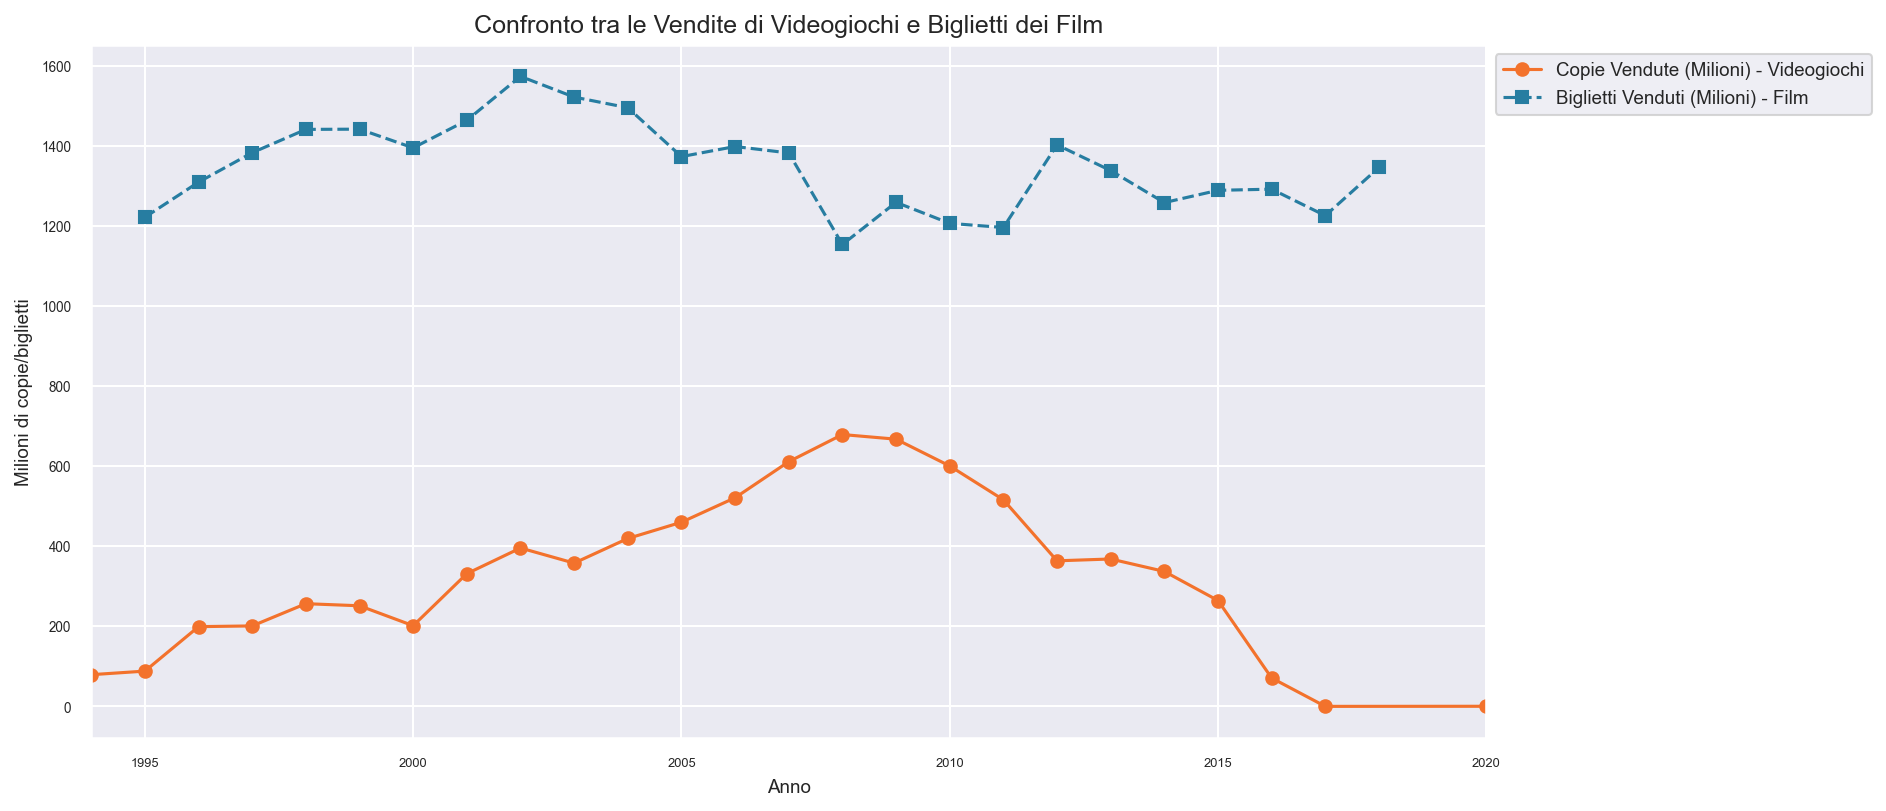

In [325]:
# Aggregare il numero di copie vendute per anno (videogiochi)
games_sales = vg.groupby("Year")["Global_Sales"].sum()

# Aggregare il numero di biglietti venduti per anno (film)
movies_sales = mv.groupby("Year")["Tickets Sold"].sum()

# Creare il grafico
plt.figure(figsize=(12,6))
plt.plot(games_sales, label="Copie Vendute (Milioni) - Videogiochi", marker='o', linestyle="-", color = "#f3722c")
plt.plot(movies_sales , label="Biglietti Venduti (Milioni) - Film", marker='s', linestyle="--", color = "#277da1")

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=9, frameon=True)
plt.xlabel("Anno",  fontsize=9)
plt.ylabel("Milioni di copie/biglietti", fontsize=9)
plt.title("Confronto tra le Vendite di Videogiochi e Biglietti dei Film", fontsize=12)
plt.grid(True)
plt.xlim(left=1994)
plt.xlim(right=2020)
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)

plt.show()

In [326]:

df_combined = pd.DataFrame({
    "Games Sales": somma_per_anno,
    "Movies Sales": somma_per_anno_film
}).dropna() 

a = df_combined["Movies Sales"].values
b = df_combined["Games Sales"].values

# Formato per la stampa
S = "{} Correlation: {:.3f} (p-value: {:.3e})"

# Pearson
corr_pearson = sp.stats.pearsonr(a, b)
print(S.format('Pearson', corr_pearson[0], corr_pearson[1]))

corr_spearman = sp.stats.spearmanr(a, b)
print( S.format('Spearman', corr_spearman[0], corr_spearman[1]) ) 
    
corr_kendall = sp.stats.kendalltau(a, b)
print( S.format('Kendall', corr_kendall[0], corr_kendall[1]) ) 
    


Pearson Correlation: -0.083 (p-value: 7.057e-01)
Spearman Correlation: -0.087 (p-value: 6.932e-01)
Kendall Correlation: -0.020 (p-value: 9.168e-01)


### Confronto sulla categoria action

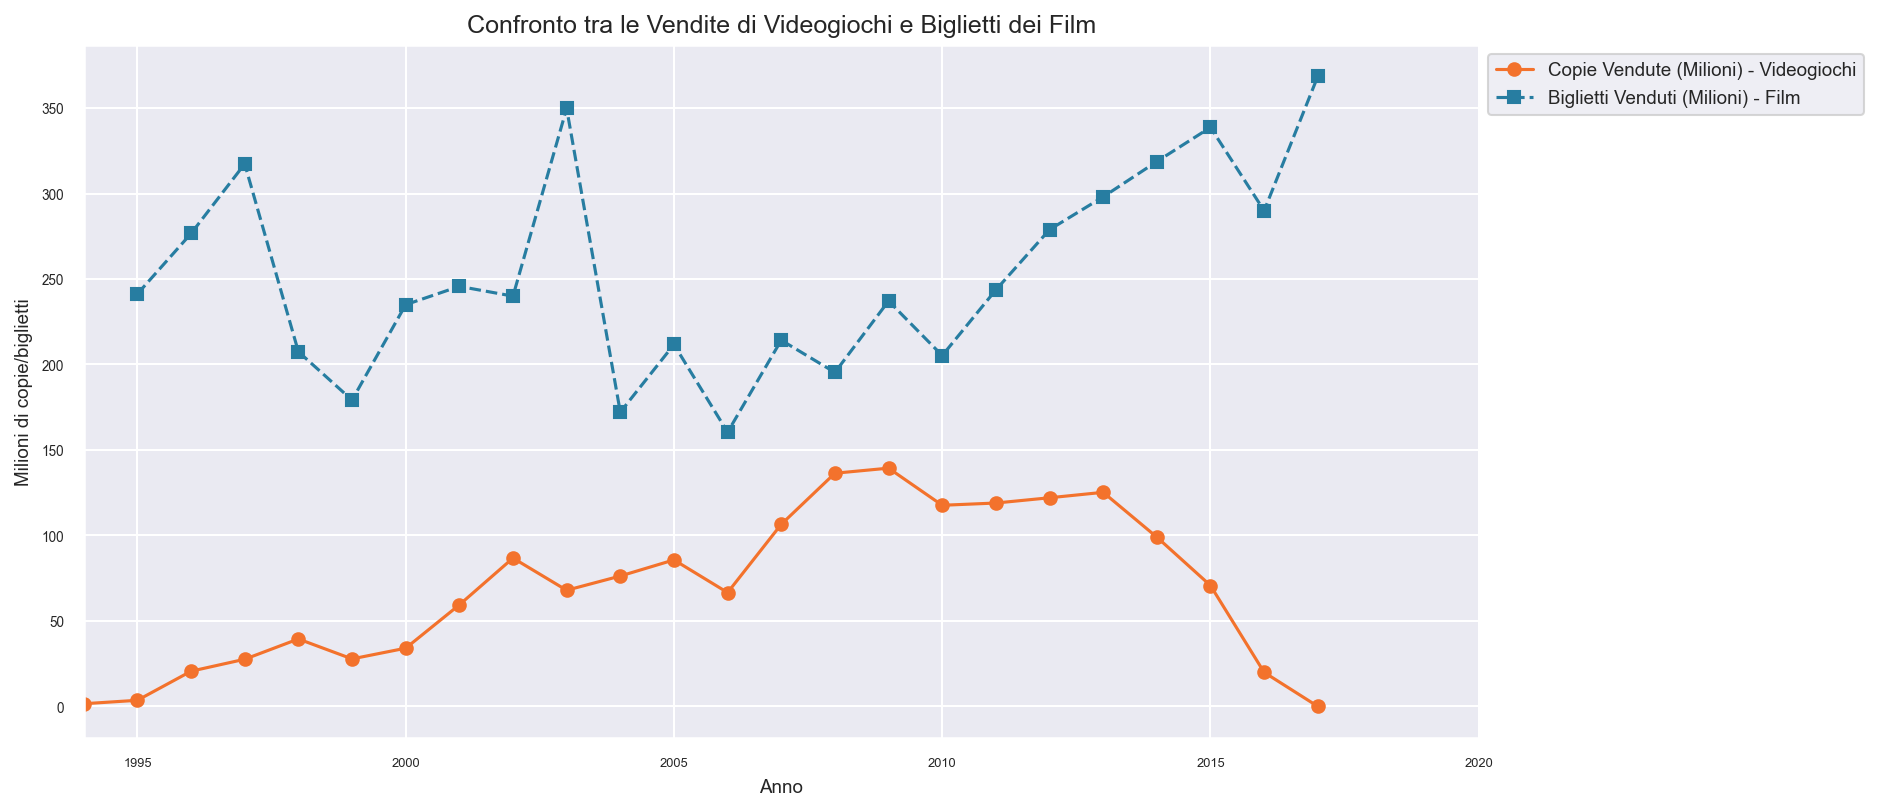

In [327]:
# Filtra solo i videogiochi di genere Action e somma le vendite per anno
somma_per_anno_action = vg[vg["Genre"] == "Action"].groupby("Year")["Global_Sales"].sum()

# Filtra solo i film di genere Action e somma i biglietti venduti per anno
movies_sales_action = action.groupby("Year")["Tickets Sold"].sum()

# Controlla che gli anni corrispondano
assert np.array_equal(x1, x2), "Gli anni delle due serie non corrispondono!"

# Parametri per le barre
width = 0.4  # Larghezza delle barre

# Creazione del grafico
plt.figure(figsize=(12,6))
plt.plot(somma_per_anno_action, label="Copie Vendute (Milioni) - Videogiochi", marker='o', linestyle="-", color = "#f3722c")
plt.plot(movies_sales_action , label="Biglietti Venduti (Milioni) - Film", marker='s', linestyle="--", color = "#277da1")

plt.legend(loc="upper left", bbox_to_anchor=(1, 1), fontsize=9, frameon=True)
plt.xlabel("Anno", fontsize=9)
plt.ylabel("Milioni di copie/biglietti", fontsize=9)
plt.title("Confronto tra le Vendite di Videogiochi e Biglietti dei Film", fontsize=12)

plt.grid(True)
plt.xlim(left=1994)
plt.xlim(right=2020)
plt.xticks(fontsize=6.2)
plt.yticks(fontsize=6.5)
plt.show()


In [328]:
# Filtra i videogiochi per il genere "Action" e somma le vendite per anno
somma_action_vg = vg[vg["Genre"] == "Action"].groupby("Year")["Global_Sales"].sum()

# Filtra i film per il genere "Action" e somma i biglietti venduti per anno
somma_action_film = mv[mv["Genre"] == "Action"].groupby("Year")["Tickets Sold"].sum()

df_action = pd.DataFrame({
    "Games Sales Action": somma_action_vg,
    "Movies Sales Action": somma_action_film
}).dropna() 

c = df_action["Games Sales Action"].values
d = df_action["Movies Sales Action"].values

# Formato per la stampa
S = "{} Correlation: {:.3f} (p-value: {:.3e})"

# Pearson
corr_pearson = sp.stats.pearsonr(c, d)
print(S.format('Pearson', corr_pearson[0], corr_pearson[1]))

corr_spearman = sp.stats.spearmanr(c, d)
print( S.format('Spearman', corr_spearman[0], corr_spearman[1]) ) 
    
corr_kendall = sp.stats.kendalltau(c, d)
print( S.format('Kendall', corr_kendall[0], corr_kendall[1]) ) 

Pearson Correlation: -0.218 (p-value: 3.174e-01)
Spearman Correlation: -0.200 (p-value: 3.612e-01)
Kendall Correlation: -0.130 (p-value: 4.023e-01)


# Conclusione
1) Generi più venduti -> Action Sport Shooter
2) Piattaforma più fruttuosa -> Sony Nintendo 
3) Annata migliore, cosa la carattrizza -> 2008 
4) Studio per regione e quale infuelza magigormente le vendite -> NA shooter EU shooter JP RP. NA e EU indicatore globlase
5) Confronto vendite biglietti film -> Nessuna correlazione evidente

Cosa approfondire:
1) Come mai 2008 anno migliore di vendita
2) 